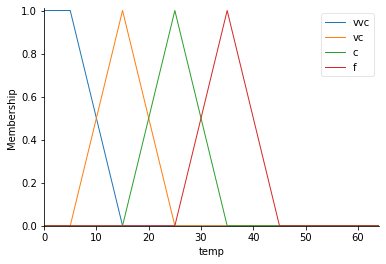

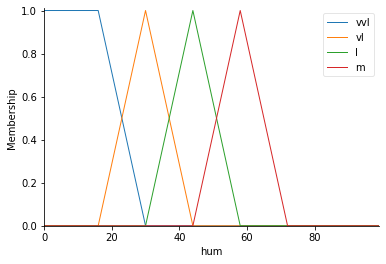

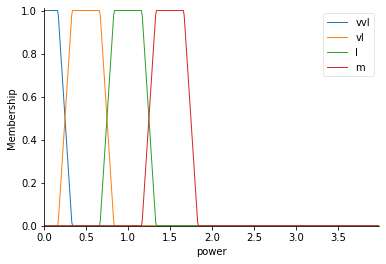

In [16]:
# pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


temp = ctrl.Antecedent(np.arange(0,65,1),'temp')
hum = ctrl.Antecedent(np.arange(0,100,1),'hum')
power = ctrl.Consequent(np.arange(0,4,0.01),'power')

#creation des pic [debut,pic,fin]
temp['vvc']=fuzz.trapmf(temp.universe,[0,0,5,15])
temp['vc']=fuzz.trimf(temp.universe,[5,15,25])
temp['c']=fuzz.trimf(temp.universe,[15,25,35])
temp['f']=fuzz.trimf(temp.universe,[25,35,45])

hum['vvl']=fuzz.trapmf(hum.universe,[0,0,16,30])
hum['vl']=fuzz.trimf(hum.universe,[16,30,44])
hum['l']=fuzz.trimf(hum.universe,[30,44,58])
hum['m']=fuzz.trimf(hum.universe,[44,58,72])

power['vvl']=fuzz.trapmf(power.universe,[0,0,0.166,0.333])
power['vl']=fuzz.trapmf(power.universe,[0.166,0.333,0.666,0.833])
power['l']=fuzz.trapmf(power.universe,[0.666,0.833,1.166,1.333])
power['m']=fuzz.trapmf(power.universe,[1.166,1.333,1.666,1.833])

temp.view()
hum.view()
power.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28aa3b4b708>)

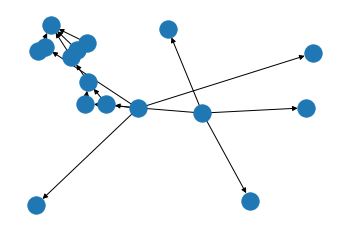

In [23]:
rule1 = ctrl.Rule(temp['vvc'] & hum['vvl'],power['vvl'])
rule2 = ctrl.Rule(temp['vvc'] & hum['vl'],power['vvl'])
rule3 = ctrl.Rule(temp['vvc'] & hum['l'],power['vl'])
rule4 = ctrl.Rule(temp['vvc'] & hum['m'],power['vl'])

rule5 = ctrl.Rule(temp['vc'] & hum['vvl'],power['vvl'])
rule6 = ctrl.Rule(temp['vc'] & hum['vl'],power['vl'])
rule7 = ctrl.Rule(temp['vc'] & hum['l'],power['vl'])
rule8 = ctrl.Rule(temp['vc'] & hum['m'],power['l'])

rule9 = ctrl.Rule(temp['c'] & hum['vvl'],power['vl'])
rule10 = ctrl.Rule(temp['c'] & hum['vl'],power['vl'])
rule11 = ctrl.Rule(temp['c'] & hum['l'],power['l'])
rule12 = ctrl.Rule(temp['c'] & hum['m'],power['l'])

rule13 = ctrl.Rule(temp['f'] & hum['vvl'],power['vl'])
rule14 = ctrl.Rule(temp['f'] & hum['vl'],power['l'])
rule15 = ctrl.Rule(temp['f'] & hum['l'],power['l'])
rule16 = ctrl.Rule(temp['f'] & hum['m'],power['m'])

rule1.view()

0.7164879225202947


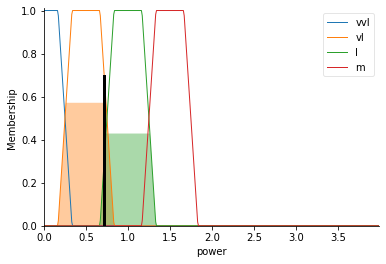

In [27]:
power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])
powerControl = ctrl.ControlSystemSimulation(power_ctrl)

powerControl.input['temp']=15
powerControl.input['hum']=50

powerControl.compute()

print(powerControl.output['power'])
power.view(sim=powerControl)